# KELOMPOK 9

Nama Kelompok :
1. Adjie Tresnohadi Dermawan
2. Baginda Habiburohman
3. Moses Johanes Febrian Manuputty 

<hr>

## 1. Perkenalan

### 1.1 Latar Belakang

Pada projek ini akan memuat dataset taksi online terutama pada taksi uber dan taksi lyft. model yang akan kami gunakan yaitu linear regression untuk melihat pola untuk melakukan predektor pada jam berkendara dan harga tiap taksi online. Dataset ini memiliki 693071 data dengan total atribut 57, namun kami akan memilih 10 atribut yang relevan dengan pemecahan kasus yang akan dibuat.

### 1.2 Objective yang ingin dicapai

1. Mampu memahami konsep regression dengan Linier Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## 2. Import Pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import preprocessing
import pickle

# 3. Data Loading

### 3.1 Import Data

In [2]:
data = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### 3.2 Cek isi data

In [5]:
data.shape

(693071, 57)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
data.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [8]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## 4. Data Cleaning

### 4.1 Menghilangkan missing value

In [9]:
median = data['price'].median()
data['price'].fillna(median, inplace=True)

In [10]:
data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### 4.2 Menghilangkan kolom yang tidak diperlukan

In [11]:
data.drop(['id',
           'timestamp', 
           'datetime',
           'timezone',
           'latitude',
           'longitude',
           'product_id',
           'short_summary',
           'long_summary',
           'precipIntensity',
           'precipProbability',
           'humidity',
           'windSpeed',
           'windGust',
           'windGustTime',
           'visibility',
           'temperatureHigh',
           'temperatureHighTime',
           'temperatureLow',
           'temperatureLowTime',
           'apparentTemperatureHigh',
           'apparentTemperatureHighTime',
           'apparentTemperatureLow',
           'apparentTemperatureLowTime',
           'icon',
           'dewPoint',
           'pressure',
           'windBearing',
           'cloudCover',
           'uvIndex',
           'visibility.1',
           'ozone',
           'sunriseTime',
           'sunsetTime',
           'moonPhase',
           'precipIntensityMax',
           'uvIndexTime',
           'temperatureMin',
           'temperatureMinTime',
           'temperatureMax',
           'temperatureMaxTime',
           'apparentTemperatureMin',
           'apparentTemperatureMinTime',
           'apparentTemperatureMax',
           'apparentTemperatureMaxTime',
           'temperature',
           'apparentTemperature'], axis=1, inplace=True)

In [12]:
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


### 4.3 Mengubah nama kolom 

In [13]:
data.rename(columns={'source':'from',
                     'cab_type':'taxi_name',
                     'name':'taxi_type'}, inplace=True)

In [14]:
data.head()

,hour,day,month,from,destination,taxi_name,taxi_type,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


In [15]:
data.tail()

,hour,day,month,from,destination,taxi_name,taxi_type,price,distance,surge_multiplier
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.0,1.0
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.0,1.0
693068,23,1,12,West End,North End,Uber,Taxi,13.5,1.0,1.0
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.0,1.0
693070,23,1,12,West End,North End,Uber,UberPool,10.0,1.0,1.0


In [16]:
data.shape

(693071, 10)

## 5. Explorasi Data

### 5.1 Perbandingan penggunaan taksi online

In [17]:
data.taxi_name.value_counts()

Uber    385663
Lyft    307408
Name: taxi_name, dtype: int64

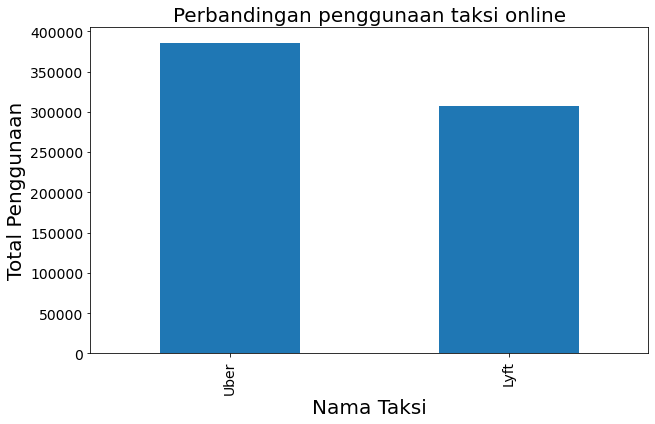

In [18]:
taxi_type = data['taxi_name'].value_counts().plot.bar(figsize=(10,6),
                                                      fontsize=14)

taxi_type.set_title('Perbandingan penggunaan taksi online', fontsize=20)
plt.xlabel('Nama Taksi', fontsize=20)
plt.ylabel('Total Penggunaan', fontsize=20)

plt.show()

Berdasarkan data diatas, uber memiliki penggunaan yang lebih banyak daripada lyft

### 5.2 Perbandingan penggunaan beberapa tipe taksi

In [19]:
data.taxi_type.value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: taxi_type, dtype: int64

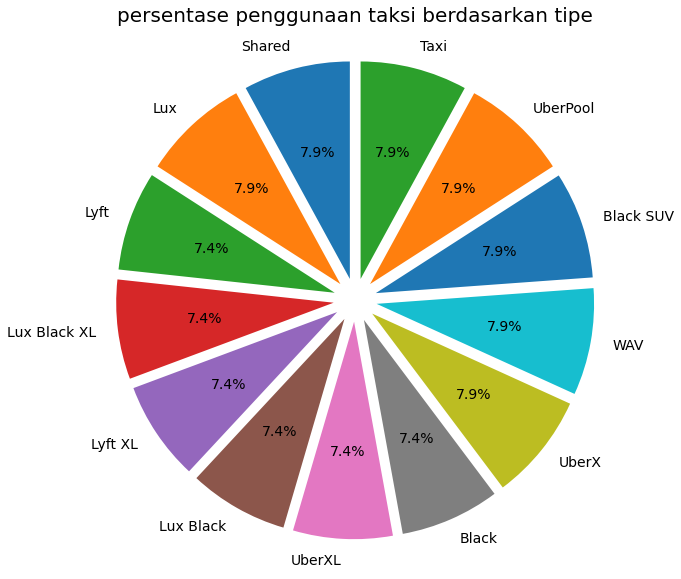

In [20]:
lables=data['taxi_type'].unique()

sizes=data.groupby(['taxi_type']).size()
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('persentase penggunaan taksi berdasarkan tipe', size=20)
ab=plt.pie( sizes, labels=lables, startangle=90,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', textprops={'fontsize': 14,'color':'black'})
plt.show()

### 5.3 Menghitung rata-rata harga tiap taksi

In [21]:
mean_price = data.groupby(by=['taxi_type','taxi_name']).price.agg(['mean'])
mean_price

,,mean
taxi_type,taxi_name,
Black,Uber,20.523786
Black SUV,Uber,30.286763
Lux,Lyft,17.771240
Lux Black,Lyft,23.062468
Lux Black XL,Lyft,32.324086
Lyft,Lyft,9.610885
Lyft XL,Lyft,15.309363
Shared,Lyft,6.029893
Taxi,Uber,13.500000


Text(0.5, 0, 'harga')

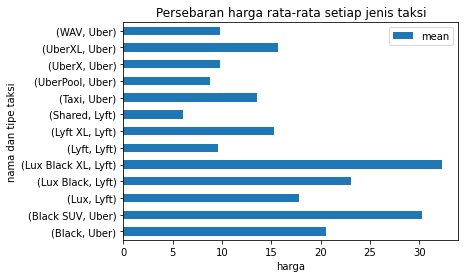

In [22]:
mean_price.plot(kind='barh')

plt.title('Persebaran harga rata-rata setiap jenis taksi')
plt.ylabel('nama dan tipe taksi')
plt.xlabel('harga')

### 5.4 Menghitung jarak maksimal yang ditempuh tiap taksi

In [23]:
max_distance = data.groupby(by=['taxi_type','taxi_name']).distance.agg(['max'])
max_distance

,,max
taxi_type,taxi_name,
Black,Uber,7.86
Black SUV,Uber,7.86
Lux,Lyft,6.33
Lux Black,Lyft,6.33
Lux Black XL,Lyft,6.33
Lyft,Lyft,6.33
Lyft XL,Lyft,6.33
Shared,Lyft,6.33
Taxi,Uber,7.86


Text(0.5, 0, 'jarak')

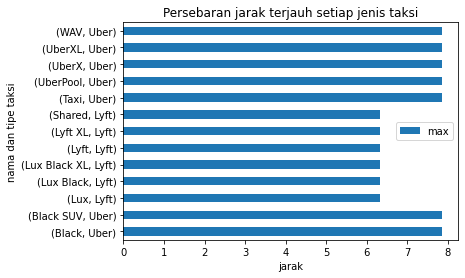

In [24]:
max_distance.plot(kind='barh')

plt.title('Persebaran jarak terjauh setiap jenis taksi')
plt.ylabel('nama dan tipe taksi')
plt.xlabel('jarak')

### 5.5 Korelasi antar variabel

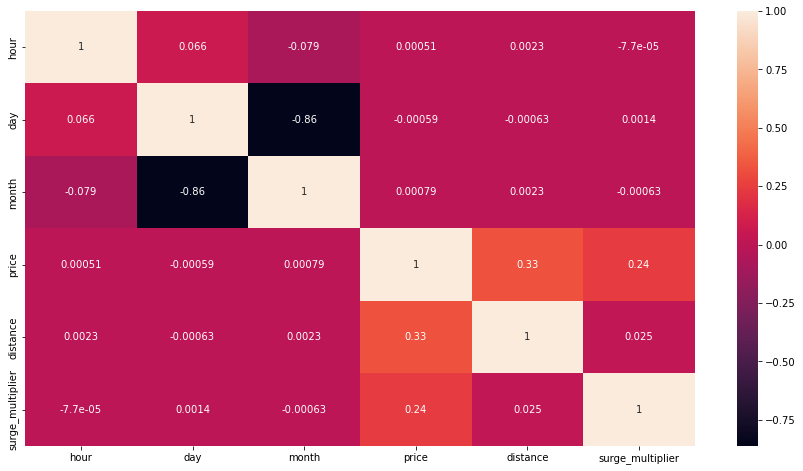

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Hasil tersebut dapat membuktikan bahwa distance dan surge_multiplier dapat mempengaruhi harga pada taksi

## 6. Data Preprocessing

In [26]:
data.drop(['hour','day','month'], axis=1, inplace=True)

In [27]:
data

,from,destination,taxi_name,taxi_type,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,West End,North End,Uber,Taxi,13.5,1.00,1.0
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [29]:
data = data[['from','destination','taxi_name', 'taxi_type',
            'distance', 'surge_multiplier','price']]

data

,from,destination,taxi_name,taxi_type,distance,surge_multiplier,price
0,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,5.0
1,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,11.0
2,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,1.00,1.0,13.0
693067,West End,North End,Uber,UberX,1.00,1.0,9.5
693068,West End,North End,Uber,Taxi,1.00,1.0,13.5
693069,West End,North End,Uber,Black SUV,1.00,1.0,27.0


### 6.1 Mengubah data menjadi numerik

In [30]:
le = preprocessing.LabelEncoder()

In [31]:
data[['from', 'destination', 'taxi_name', 'taxi_type']] = data[['from', 'destination', 'taxi_name', 'taxi_type']].apply(le.fit_transform)

In [32]:
x = data.drop(['price'], axis=1)
y = data['price']

print(x)
print(y)

        from  destination  taxi_name  taxi_type  distance  surge_multiplier
0          5            7          0          7      0.44               1.0
1          5            7          0          2      0.44               1.0
2          5            7          0          5      0.44               1.0
3          5            7          0          4      0.44               1.0
4          5            7          0          6      0.44               1.0
...      ...          ...        ...        ...       ...               ...
693066    11            6          1         11      1.00               1.0
693067    11            6          1         10      1.00               1.0
693068    11            6          1          8      1.00               1.0
693069    11            6          1          1      1.00               1.0
693070    11            6          1          9      1.00               1.0

[693071 rows x 6 columns]
0          5.0
1         11.0
2          7.0
3         26.0
4

### 6.2 Membagi data test dan train

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 7. Pendefinisian Model

In [34]:
model = LinearRegression()
model =model.fit(x_train, y_train)
model_pred = model.predict(x_test)

In [47]:
model_pred

array([ 8.71284321, 23.1529376 ,  6.95805003, ..., 20.99778035,
       13.61540671, 13.1437069 ])

In [35]:
model.intercept_

-2.9483084654629934

In [36]:
model.coef_

array([ 3.10857683e-02,  1.04701525e-02,  2.88354642e+00, -1.48501611e+00,
        2.56130394e+00,  2.05080198e+01])

In [37]:
print('Score :',r2_score(y_test, model_pred))

Score : 0.509938767644693


## 8. Model Inference

In [38]:
data.head()

,from,destination,taxi_name,taxi_type,distance,surge_multiplier,price
0,5,7,0,7,0.44,1.0,5.0
1,5,7,0,2,0.44,1.0,11.0
2,5,7,0,5,0.44,1.0,7.0
3,5,7,0,4,0.44,1.0,26.0
4,5,7,0,6,0.44,1.0,9.0


Untuk bagian ini, akan mencoba memberikan data baru selain data yang tersedia pada dataset untuk melakukan prediksi harga

In [71]:
From = int(input('From:'))
Destination = int(input('Destination:'))
Taxi_name = int(input('Taxi_name:'))
Taxi_type = int(input('Taxi_type:'))
Distance = float(input('Distance:'))
surge_multiplier = float(input('s_m:'))

ans = [From, Destination, Taxi_name, Taxi_type, Distance, surge_multiplier]

From:2
Destination:3
Taxi_name:1
Taxi_type:4
Distance:20
s_m:1


In [72]:
predict = model.predict([ans])

In [73]:
print('Prediction:',predict)

Prediction: [65.82285414]


## Kesimpulan

Berdasarkan Analisis diatas, dapat disimpulkan bahwa:
1. Uber memiliki lebih banyak pengguna daripada lyft
2. Rata-rata harga yang paling besar adalah uber dengan type Black SUV
3. Jarak tempuh yang paling besar adalah uber dengan type Black dan Black SUV
4. distance dan surge_multiplier mempengaruhi pada tarif harga taksi
5. akurasi yang didapatkan pada model yang dilakukan yaitu 50.9%